In [69]:
##############################
# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme
##############################

In [70]:
##############################
# Breast Cancer
##############################

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [72]:
df = pd.read_csv("breast_cancer.csv")

In [73]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
y = df["diagnosis"]
X = df.drop(["diagnosis","id"], axis=1)

In [75]:
def create_pca_df(X,y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(pca_fit, columns=["PC1", "PC2"])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df


In [76]:
pca_df = create_pca_df(X,y)

In [77]:
df.shape

(569, 32)

In [78]:
def plot_pca(dataframe,target):
    fig= plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PC1", fontsize=15)
    ax.set_ylabel("PC2", fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(["r","b","g","y"],len(targets))
    
    for t,color in zip(targets,colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, "PC1"], dataframe.loc[indices, "PC2"], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

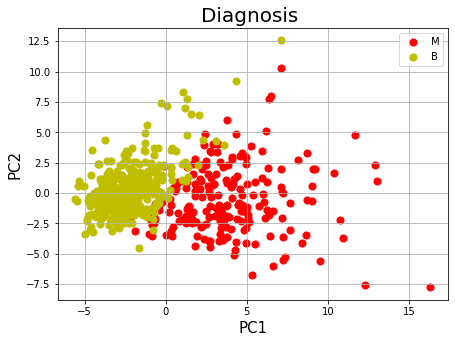

In [79]:
plot_pca(pca_df,"diagnosis")

In [80]:
##############################
# Iris
##############################

In [81]:
df = sns.load_dataset("iris")

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
y = df["species"]
X = df.drop(["species"], axis=1)

In [84]:
pca_df = create_pca_df(X,y)

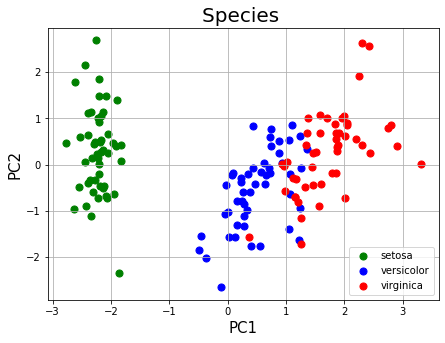

In [85]:
plot_pca(pca_df, "species")